In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
x_data
noise

array([-0.31923449, -0.52284503,  0.08596999, ..., -1.67365406,
        0.6980233 ,  1.45796694])

In [5]:
#y = mx + b, b = 5
y_true = (0.5 * x_data) + 5 + noise

In [6]:
x_df = pd.DataFrame(data = x_data, columns=['X_Data'])

In [7]:
y_df = pd.DataFrame(data = y_true, columns=['Y'])

In [8]:
x_df.head()
y_df.head()

,Y
0,4.680766
1,4.477160
2,5.085980
3,5.566996
4,4.551148


In [9]:
my_data = pd.concat([x_df,y_df],axis=1)

In [10]:
my_data.head()

,X_Data,Y
0,0.00000,4.680766
1,0.00001,4.477160
2,0.00002,5.085980
3,0.00003,5.566996
4,0.00004,4.551148


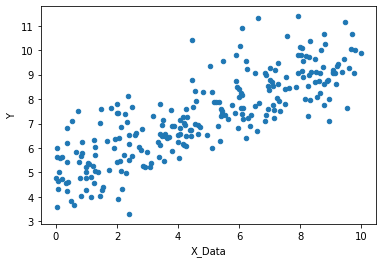

In [11]:
my_data.sample(n=250).plot(kind = 'scatter',x='X_Data', y = 'Y')

In [12]:
batch_size = 8

In [13]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [14]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [15]:
#model
y_model = m*xph + b

In [16]:
#Cost Funtion
error = tf.reduce_sum(tf.square(yph-y_model))

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [18]:
init = tf.global_variables_initializer()

In [19]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
    model_m, model_b = sess.run([m,b])

In [20]:
model_m

0.5301229

In [21]:
model_b

4.9781785

In [22]:
y_hat = x_data * model_m + model_b

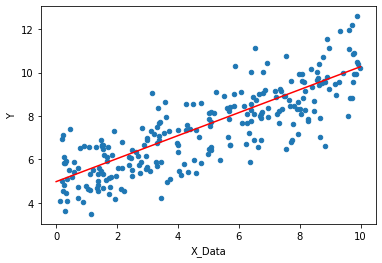

In [23]:
my_data.sample(n=250).plot(kind = 'scatter',x='X_Data', y = 'Y')
plt.plot(x_data,y_hat,'r')